In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind


In [11]:
data_path = 'FEV.xlsx'
df = pd.read_excel(data_path)

In [33]:
df.head(5) #checking the file whether imported correctly or not

,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95.0,438,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.45
1,Audi e-tron 50 quattro,Audi,e-tron 50 quattro,308400,313,540,disc (front + rear),4WD,71.0,340,...,3040.0,670.0,5,5,19,190,660.0,6.8,150,23.80
2,Audi e-tron S quattro,Audi,e-tron S quattro,414900,503,973,disc (front + rear),4WD,95.0,364,...,3130.0,565.0,5,5,20,210,660.0,4.5,150,27.55
3,Audi e-tron Sportback 50 quattro,Audi,e-tron Sportback 50 quattro,319700,313,540,disc (front + rear),4WD,71.0,346,...,3040.0,640.0,5,5,19,190,615.0,6.8,150,23.30
4,Audi e-tron Sportback 55 quattro,Audi,e-tron Sportback 55 quattro,357000,360,664,disc (front + rear),4WD,95.0,447,...,3130.0,670.0,5,5,19,200,615.0,5.7,150,23.85


In [45]:
#Task 1
filtered_df = df[(df['Minimal price (gross) [PLN]'] <= 350000) & (df['Range (WLTP) [km]'] >= 400)]
grouped_by_make = filtered_df.groupby('Make')
avg_battery_capacity = grouped_by_make['Battery capacity [kWh]'].mean()
print("Average Battery Capacity by Manufacturer")
print(avg_battery_capacity)


Average Battery Capacity by Manufacturer
Make
Audi             95.000000
BMW              80.000000
Hyundai          64.000000
Kia              64.000000
Mercedes-Benz    80.000000
Tesla            68.000000
Volkswagen       70.666667
Name: Battery capacity [kWh], dtype: float64


In [41]:
#Task 2
energy_consumption = df['mean - Energy consumption [kWh/100 km]']
z_scores = (energy_consumption - energy_consumption.mean()) / energy_consumption.std()
outliers = df[(z_scores.abs() > 3)]
print("\n Outliers in Energy Consumption")
print(outliers[['Car full name', 'mean - Energy consumption [kWh/100 km]']])



 Outliers in Energy Consumption
Empty DataFrame
Columns: [Car full name, mean - Energy consumption [kWh/100 km]]
Index: []


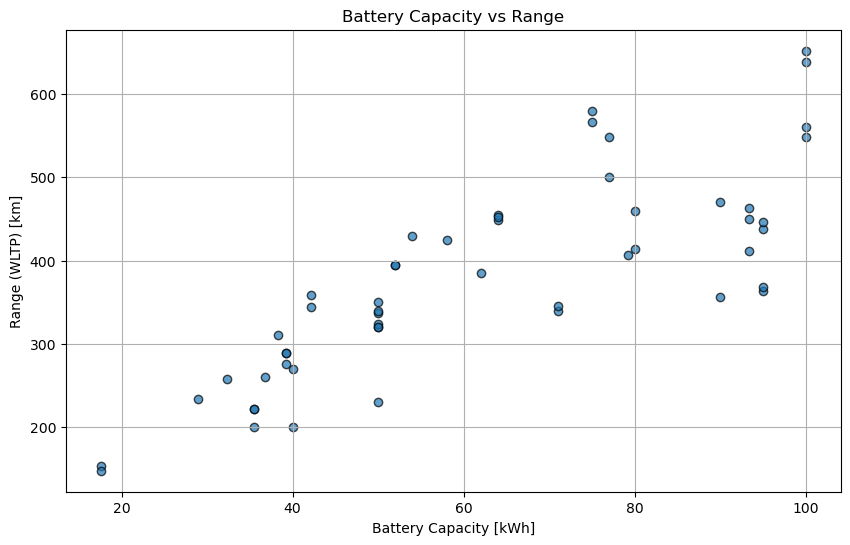


 Correlation between Battery Capacity and Range: 0.81


In [39]:
#Task 3
# a) Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Battery capacity [kWh]'], df['Range (WLTP) [km]'], alpha=0.7, edgecolor='k')
plt.title('Battery Capacity vs Range')
plt.xlabel('Battery Capacity [kWh]')
plt.ylabel('Range (WLTP) [km]')
plt.grid(True)
plt.show()

# b) Highlight Insights
correlation = df['Battery capacity [kWh]'].corr(df['Range (WLTP) [km]'])
print(f"\n Correlation between Battery Capacity and Range: {correlation:.2f}")


In [35]:
#Task 4
class EVRecommendation:
    def __init__(self, df):
        self.df = df

    def recommend(self, budget, desired_range, min_battery_capacity):
        recommendations = self.df[(self.df['Minimal price (gross) [PLN]'] <= budget) &
                                   (self.df['Range (WLTP) [km]'] >= desired_range) &
                                   (self.df['Battery capacity [kWh]'] >= min_battery_capacity)]
        return recommendations.nlargest(3, 'Range (WLTP) [km]')[['Car full name', 'Make', 'Range (WLTP) [km]', 'Battery capacity [kWh]']]

recommender = EVRecommendation(df)
budget = 350000
desired_range = 400
min_battery_capacity = 50
recommendations = recommender.recommend(budget, desired_range, min_battery_capacity)
print("\n Top 3 EV Recommendations")
print(recommendations)



 Top 3 EV Recommendations
                Car full name        Make  Range (WLTP) [km]  \
40   Tesla Model 3 Long Range       Tesla                580   
41  Tesla Model 3 Performance       Tesla                567   
48      Volkswagen ID.3 Pro S  Volkswagen                549   

    Battery capacity [kWh]  
40                    75.0  
41                    75.0  
48                    77.0  


In [37]:
#Task 5
# Comparing Engine power between Tesla and Audi
tesla_power = df[df['Make'] == 'Tesla']['Engine power [KM]']
audi_power = df[df['Make'] == 'Audi']['Engine power [KM]']

# Performing two-sample t-test
stat, p_value = ttest_ind(tesla_power.dropna(), audi_power.dropna(), equal_var=False)
print("\n Hypothesis Testing")
print(f"T-statistic: {stat:.2f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("There is a significant difference in the average engine power between Tesla and Audi.")
else:
    print("No significant difference in the average engine power between Tesla and Audi.")



 Hypothesis Testing
T-statistic: 1.79, P-value: 0.1068
No significant difference in the average engine power between Tesla and Audi.


# Analysis Video
[Click here to watch](<https://drive.google.com/file/d/1hQQfBR0n63-6D-0iO_pWvKA8_PSy8Aqu/view?usp=sharing>)
